In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import random
kolumny = int
wiersze = int
oceny = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

### Wylosować macierz z ocenami z zakresu 2.0-5.5 i przyjąć, że wiersze reprezentują studentów, a kolumny odpowiadają poszczególnym przedmiotom.

In [3]:
def wylosuj_macierz(wielkosc: Tuple[wiersze, kolumny]) -> np.array:
    assert wielkosc[0]>0 and wielkosc[1]>0, "Macierz musi mieć dodatnią wielkość."
    _ = []
    for _w in range(0, wielkosc[0]):
        wiersz = []
        for _k in range(0, wielkosc[1]):
            wiersz.append(random.choice(oceny))
        _.append(wiersz)
    return np.array(_, np.float16)

#### Przykład stworzonej przez nas macierzy:

In [4]:
(macierz := wylosuj_macierz((8,3)))

array([[3.5, 4.5, 3.5],
       [3.5, 2.5, 3. ],
       [4. , 2. , 3.5],
       [2.5, 3.5, 5. ],
       [3.5, 2.5, 2. ],
       [4. , 4.5, 4.5],
       [5.5, 4.5, 2.5],
       [5. , 3.5, 2.5]], dtype=float16)

Kolumny => Przedmiot
Wiersze => Student

In [5]:
def ile_nie_zaliczylo(n_przedmiotow: int) -> int:
    liczba = 0
    for student in macierz:
        niezaliczone = 0
        for ocena in student:
            if ocena in [2.0, 2.5]:
                niezaliczone += 1
        if niezaliczone >= n_przedmiotow:
            liczba += 1
    return liczba
ile_nie_zaliczylo(1)

6

In [6]:
def min_max_srednia() -> np.array:
    i_min = 0 # index minimum
    a_min = 0.0 # srednia minimum
    i_max = 0 # index maksimum
    a_max = 0.0 # srednia maksimum
    for i, student in enumerate(macierz):
        srednia = student.mean()
        if srednia > a_max:
            i_max = i
        if srednia < a_min:
            i_min = i
    return macierz[i_min], macierz[i_max]
min_max_srednia()

(array([3.5, 4.5, 3.5], dtype=float16), array([5. , 3.5, 2.5], dtype=float16))

In [7]:
def n_of_max() -> np.array:
    _max = macierz.max()
    n_of_maxes = np.count_nonzero(macierz == _max, axis=1)
    return np.where(np.max(n_of_maxes) == n_of_maxes)
n_of_max()

(array([6]),)

In [9]:
def lista_ze_srednimi() -> list:
    studenci = []
    for i, student in enumerate(macierz):
        if student.mean() >= 4.0:
            studenci.append(i)
    return studenci
lista_ze_srednimi()

[5, 6]

### Wyznaczyć odległość symetryczną dwóch macierzy o jednakowych wymiarach. Odległość symetryczna dana jest wzorem:
$\sum_{i=1}^{L}\sum_{j=1}^{L}|p_{i,j} - q_{i,j}|$

In [10]:
print((p := wylosuj_macierz((5,5))), end="\n\n")
print((q := wylosuj_macierz((5,5))))

[[3.5 4.5 4.  2.  2. ]
 [2.5 5.  5.  4.5 2. ]
 [4.  5.5 2.  5.  2. ]
 [5.5 2.  2.  4.  5. ]
 [2.  2.  5.5 3.5 5.5]]

[[4.  2.5 3.  4.5 3. ]
 [4.  5.  5.  3.  4.5]
 [4.5 2.5 4.  4.  2.5]
 [2.5 4.  4.  5.  5. ]
 [4.5 5.5 4.  5.  4. ]]


In [101]:
(odleglosc_symetryczna := (abs(p-q)).sum())

38.0

### Sprowadzić macierz do postaci schodkowej zredukowanej

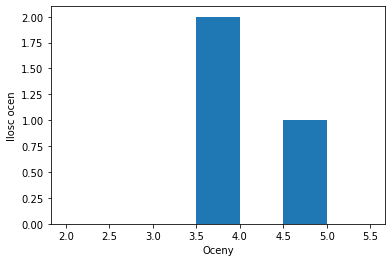

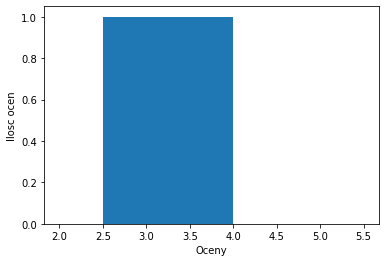

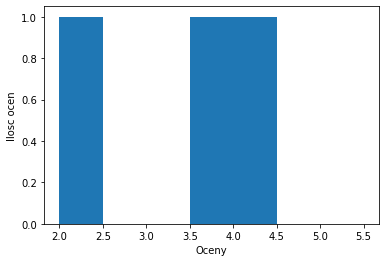

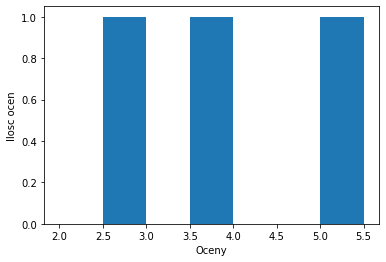

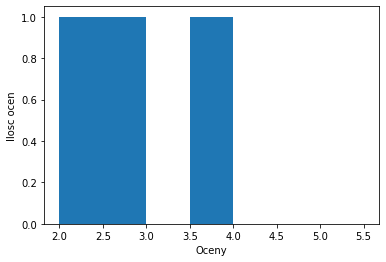

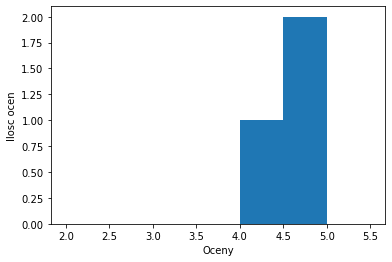

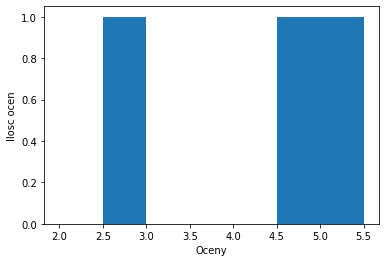

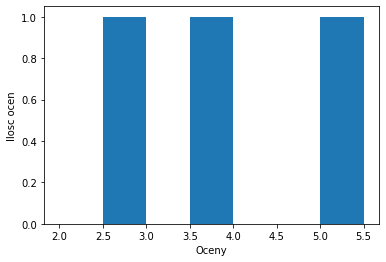

In [100]:
def histogram():
    for student in macierz:
        plt.hist(student, bins=oceny)
        plt.xlabel("Oceny")
        plt.ylabel("Ilosc ocen")
        plt.show()
histogram()

### Przyjąć, że pierwsza macierz przedstawia paragon w sklepie i zawiera w kolumnach: numer klienta, numer towaru, liczbę sztuk (lub wagę w kilogramach). Druga macierz zawiera opisy towarów, tj.: numer towaru, cenę jednostkową (lub za kg), informację czy towar jest sprzedawany na sztuki czy na wagę.

In [76]:
sztuki = True
waga = False
paragon = np.array([
    [1, 2, 10  ],
    [2, 2, 5.2 ],
    [2, 1, 3   ],
    [3, 1, 12  ],
    [4, 4, 7   ],
    [4, 3, 7   ]
])
opis_towaru = np.array([
    [1, 7.50, sztuki],
    [2, 4,    waga],
    [3, 2,    sztuki],
    [4, 4,    waga]
])

In [77]:
def check_product_in_paragon():
    return set(paragon[:, 1]) == set(opis_towaru[:, 0])

def check_sztuki():
    for item in paragon:
        towar = opis_towaru[int(item[1]-1)]
        if towar[2] and item[2] - np.float64(np.floor(item[2])) != 0:
            return False
    return True

print("Produkty na paragonie są w opisie towaru:", check_product_in_paragon())
print("Sztuki = int, waga = float", check_sztuki())

Produkty na paragonie są w opisie towaru: True
Sztuki = int, waga = float True


In [79]:
def policz_koszt():
    koszt = dict.fromkeys(set(paragon[:, 0]), 0.0)
    for item in paragon:
        koszt[item[0]] += opis_towaru[int(item[1])-1][1] * item[2]
    return koszt
policz_koszt()

{1.0: 40.0, 2.0: 43.3, 3.0: 90.0, 4.0: 42.0}

Teraz troche popsujemy:
1. dodajemy do paragonu nieistniejący produkt.
2. produkt na sztuki ma część po przecinku

In [80]:
# 1
paragon[5, 1] = 6
# 2
paragon[2, 2] = 3.1
# teraz oba powinny zwrócić fałsz
print("Produkty na paragonie są w opisie towaru:", check_product_in_paragon())
print("Sztuki = int, waga = float", check_sztuki())

Produkty na paragonie są w opisie towaru: False
Sztuki = int, waga = float False
